In [1]:
# for loading/processing the images  
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score # metrics error
from sklearn.model_selection import train_test_split # resampling method
# models 

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
X = pd.read_csv("labels_train.csv")
path ="train"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename




In [3]:
print(X.shape)

(15470, 2)


In [4]:

X.head()

,file,label
0,P00001_1.png,N
1,P00001_2.png,N
2,P00002_1.png,N
3,P00003_1.png,N
4,P00004_1.jpeg,N


label
N    9354
P    4250
T    1866
dtype: int64


<AxesSubplot:title={'center':'Distribution of target'}, xlabel='label'>

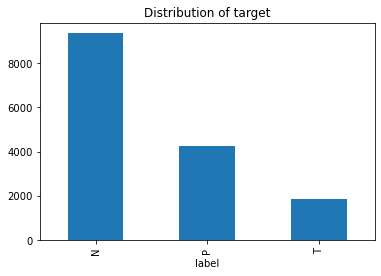

In [5]:
target_dist=X.groupby('label').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

In [6]:
YY=X['label']

In [7]:
b=[]
XX=[]
for i in X['file']:
    img = load_img(i, color_mode="grayscale",target_size=(200,200))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)/255
    XX.append(img)
    b.append((img.shape))

In [8]:
len(b)

15470

In [9]:

df2 = X.assign(Shape=b)
df2.head()

,file,label,Shape
0,P00001_1.png,N,"(200, 200)"
1,P00001_2.png,N,"(200, 200)"
2,P00002_1.png,N,"(200, 200)"
3,P00003_1.png,N,"(200, 200)"
4,P00004_1.jpeg,N,"(200, 200)"


In [11]:
target_dist.describe()

count    1.000000
mean     9.646658
std           NaN
min      9.646658
25%      9.646658
50%      9.646658
75%      9.646658
max      9.646658
dtype: float64

In [12]:
type(target_dist)

pandas.core.series.Series

In [13]:
print(target_dist)

Shape
(200, 200)    9.646658
dtype: float64


In [14]:
type(target_dist.index)

pandas.core.indexes.base.Index

In [16]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.25, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.multiclass import OneVsRestClassifier

In [19]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [20]:
nsamples, nx, ny = np.shape(X_train)
X_train1=np.reshape(X_train,(nsamples,nx*ny))


In [21]:
knn.fit(X_train1,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [22]:
knn.predict(X_test[0].reshape(1,-1))

array(['N'], dtype='<U1')

In [23]:
nsamples, nx, ny = np.shape(X_test)
X_test1=np.reshape(X_test,(nsamples,nx*ny))

In [24]:
knn.predict(X_test1)

array(['N', 'N', 'P', ..., 'P', 'N', 'P'], dtype='<U1')

In [25]:
np.shape(X_test1)

(3868, 40000)

In [26]:
predictions=knn.predict(X_test1)

In [27]:
import time
%time
# 98%
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))


Wall time: 0 ns
KNN Accuracy: 0.845


In [30]:
print('KNN f1 score: %.3f' % f1_score(y_test,predictions,average='macro'))

KNN f1 score: 0.735


In [29]:
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.8453981385729059')

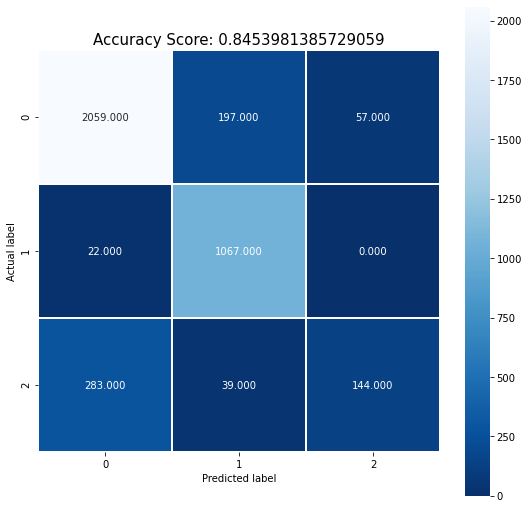

In [30]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)